In [16]:

##step 1
import numpy as np
import pandas as pd
from sklearn import preprocessing
from google.colab import files
import matplotlib.pyplot as plt
uploaded = files.upload()


Saving dataset_assignment1.csv to dataset_assignment1 (1).csv


In [17]:
##step 2
#import data
df=pd.read_csv('/content/dataset_assignment1.csv')
#see the head of table with name
print(df.head())
#is used to print statistical summary 
print(df.describe())

   feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0         5         1         1         1         2         1         3   
1         5         4         4         5         7        10         3   
2         3         1         1         1         2         2         3   
3         6         8         8         1         3         4         3   
4         4         1         1         3         2         1         3   

   feature8  feature9  class  
0         1         1      0  
1         2         1      0  
2         1         1      0  
3         7         1      0  
4         1         1      0  
         feature1    feature2    feature3    feature4    feature5    feature6  \
count  700.000000  700.000000  700.000000  700.000000  700.000000  700.000000   
mean     4.415714    3.131429    3.204286    2.804286    3.214286    3.557143   
std      2.814236    3.050343    2.970958    2.854153    2.213193    3.613026   
min      1.000000    1.000000    1.0000

In [18]:
# -Count the number of samples for each class
class_counts = df['class'].value_counts()
# Print the class counts
print(class_counts)

0    459
1    241
Name: class, dtype: int64


In [19]:
# Group samples by class
grouped_data = df.groupby('class')

# Loop over each class
for class_name, group in grouped_data:
    print(f'Statistics for {class_name}:')
    # Calculate statistics for each feature
    feature_stats = group.drop(columns='class').describe()
    # Print feature statistics
    print(feature_stats)


Statistics for 0:
         feature1    feature2    feature3    feature4    feature5    feature6  \
count  459.000000  459.000000  459.000000  459.000000  459.000000  459.000000   
mean     2.956427    1.324619    1.442266    1.363834    2.119826    1.437908   
std      1.672490    0.906830    0.996960    0.995886    0.916145    1.310839   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
50%      3.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
75%      4.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
max      8.000000    9.000000    8.000000   10.000000   10.000000   10.000000   

         feature7    feature8    feature9  
count  459.000000  459.000000  459.000000  
mean     2.102397    1.289760    1.063181  
std      1.079976    1.057787    0.501456  
min      1.000000    1.000000    1.000000  
25%      1.000000    1.000000   

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9', 'class'],
      dtype='object')

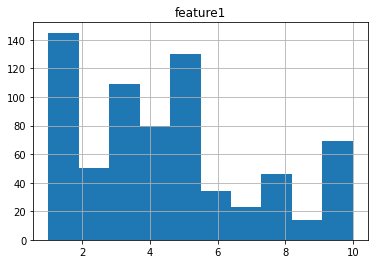

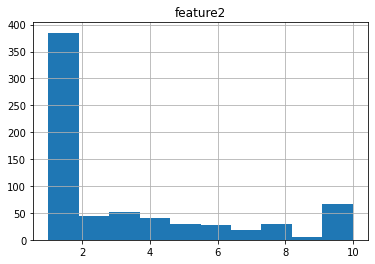

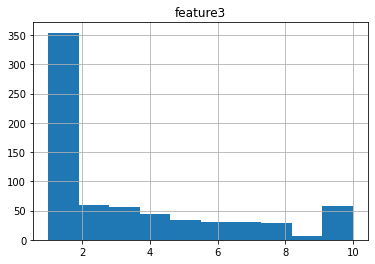

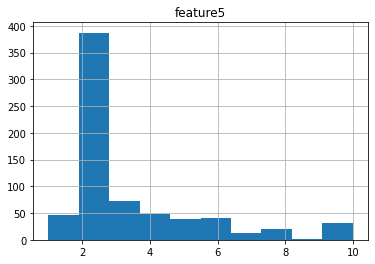

In [20]:
##step 3
#histogran for feature 1 and 2
df.hist(column='feature1')
df.hist(column='feature2')
df.hist(column='feature3')
df.hist(column='feature5')

df.columns

In [21]:
#This code selects the columns feature1 through feature9 from the pandas DataFrame df and creates a NumPy array X containing the values of these columns. The values attribute returns the underlying NumPy array of the DataFrame.
X=df[['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9']].values
X[:,:]

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1],
       [ 3,  1,  1, ...,  3,  1,  1]])

In [22]:
#my labels :
y=df['class'].values
y[0:50]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1])

In [23]:
scaler=preprocessing.StandardScaler().fit(X)
x=scaler.transform(X.astype(float))
x[0:5]

array([[ 0.20776634, -0.69925018, -0.74247497, -0.63261351, -0.54905024,
        -0.7082627 , -0.17952962, -0.61122446, -0.34363701],
       [ 0.20776634,  0.28494914,  0.2680224 ,  0.76985508,  1.71174487,
         1.78450547, -0.17952962, -0.28336459, -0.34363701],
       [-0.50341428, -0.69925018, -0.74247497, -0.63261351, -0.54905024,
        -0.43128846, -0.17952962, -0.61122446, -0.34363701],
       [ 0.56335664,  1.5972149 ,  1.61535221, -0.63261351, -0.09689122,
         0.12266002, -0.17952962,  1.35593471, -0.34363701],
       [-0.14782397, -0.69925018, -0.74247497,  0.06862078, -0.54905024,
        -0.7082627 , -0.17952962, -0.61122446, -0.34363701]])

In [24]:
#Step-4
#spilit data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)
print('train_set:',X_train.shape,y_train.shape)
print('test_set:',X_test.shape,y_test.shape)

train_set: (560, 9) (560,)
test_set: (140, 9) (140,)


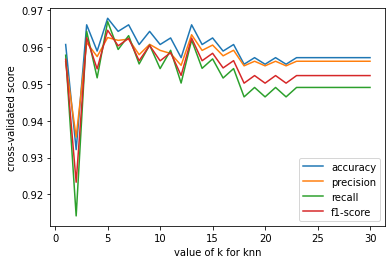

Best k for accuracy: 5
Best k for precision: 13
Best k for recall: 5
Best k for F1-score: 5
Accuracy Score: 0.9714285714285714
Precision Score: 0.9777777777777777
recall Score: 0.9361702127659575
f1 Score: 0.9565217391304347
Accuracy:               precision    recall  f1-score   support

           0       0.97      0.99      0.98        93
           1       0.98      0.94      0.96        47

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140

Precision:               precision    recall  f1-score   support

           0       0.97      0.99      0.98        93
           1       0.98      0.94      0.96        47

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140

Recall:               precision    recall  f1-score   support

           0       0.97      0.99    

In [25]:
#Step 5
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

k_range = range(1, 31)
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Compute accuracy, precision, recall, and F1-score
    accuracy = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()
    precision = cross_val_score(knn, X_train, y_train, cv=5, scoring='precision_macro').mean()
    recall = cross_val_score(knn, X_train, y_train, cv=5, scoring='recall_macro').mean()
    f1 = cross_val_score(knn, X_train, y_train, cv=5, scoring='f1_macro').mean()
    
    # Append scores to respective lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
# Plot
plt.plot(k_range, accuracy_scores, label='accuracy')
plt.plot(k_range, precision_scores, label='precision')
plt.plot(k_range, recall_scores, label='recall')
plt.plot(k_range, f1_scores, label='f1-score')
plt.xlabel('value of k for knn')
plt.ylabel('cross-validated score')
plt.legend()
plt.show()

# Print best k for each metric
max_accuracy = max(accuracy_scores)
max_precision = max(precision_scores)
max_recall = max(recall_scores)
max_f1 = max(f1_scores)

print(f'Best k for accuracy: {k_range[accuracy_scores.index(max_accuracy)]}')
print(f'Best k for precision: {k_range[precision_scores.index(max_precision)]}')
print(f'Best k for recall: {k_range[recall_scores.index(max_recall)]}')
print(f'Best k for F1-score: {k_range[f1_scores.index(max_f1)]}')

# Best k for each metric
best_k_accuracy = k_range[accuracy_scores.index(max_accuracy)]
best_k_precision = k_range[precision_scores.index(max_precision)]
best_k_recall = k_range[recall_scores.index(max_recall)]
best_k_f1 = k_range[f1_scores.index(max_f1)]

# Create KNN classifier with best K for each metric
knn_accuracy = KNeighborsClassifier(n_neighbors=best_k_accuracy)
knn_precision = KNeighborsClassifier(n_neighbors=best_k_precision)
knn_recall = KNeighborsClassifier(n_neighbors=best_k_recall)
knn_f1 = KNeighborsClassifier(n_neighbors=best_k_f1)

# Fit classifiers on training set
knn_accuracy.fit(X_train, y_train)
knn_precision.fit(X_train, y_train)
knn_recall.fit(X_train, y_train)
knn_f1.fit(X_train, y_train)

# from sklearn.metrics import classification_report
# Predict on test set
y_pred_accuracyknn = knn_accuracy.predict(X_test)
y_pred_precisionknn = knn_precision.predict(X_test)
y_pred_recallknn = knn_recall.predict(X_test)
y_pred_f1knn = knn_f1.predict(X_test)

# Compute metrics
from sklearn import metrics
accuracy_score = metrics.accuracy_score(y_test, y_pred_accuracyknn)
print("Accuracy Score:", accuracy_score)
Precision_score = metrics.precision_score(y_test, y_pred_precisionknn)
print("Precision Score:", Precision_score)
recall_score = metrics.recall_score(y_test, y_pred_f1knn)
print("recall Score:", recall_score)
f1_score = metrics.f1_score(y_test, y_pred_f1knn)
print("f1 Score:", f1_score)



print(f'Accuracy: {classification_report(y_test, y_pred_accuracyknn)}')
print(f'Precision: {classification_report(y_test, y_pred_precisionknn)}')
print(f'Recall: {classification_report(y_test, y_pred_recallknn)}')
print(f'F1-score: {classification_report(y_test, y_pred_f1knn)}')



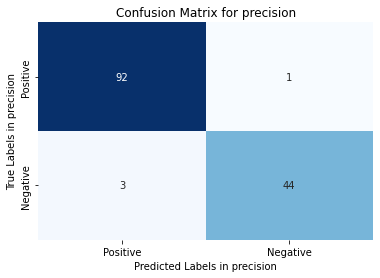

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test,y_pred_accuracyknn )
# # Plot the confusion matrix as a heatmap

#precision
# Calculate the confusion matrix
cm = confusion_matrix(y_test,y_pred_precisionknn )
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Add labels, title and ticks to the plot
plt.title("Confusion Matrix for precision")
plt.xlabel("Predicted Labels in precision")
plt.ylabel("True Labels in precision")
plt.xticks([0.5, 1.5], ["Positive","Negative", ])
plt.yticks([0.5, 1.5], ["Positive","Negative", ])
plt.show()





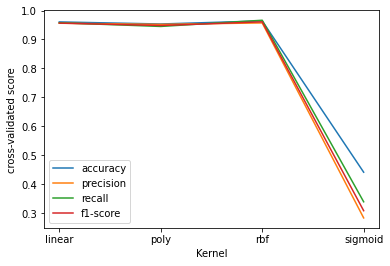

Accuracy Score: 0.9714285714285714
Precision Score: 0.9574468085106383
recall Score: 0.9574468085106383
f1 Score: 0.9574468085106385
Best kernel for accuracy: rbf
Best kernel for precision: rbf
Best kernel for recall: rbf
Best kernel for F1-score: rbf
Accuracy:               precision    recall  f1-score   support

           0       0.98      0.98      0.98        93
           1       0.96      0.96      0.96        47

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

Precision:               precision    recall  f1-score   support

           0       0.98      0.98      0.98        93
           1       0.96      0.96      0.96        47

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

Recall:               precision    recall  f1-score   support

          

In [27]:
##SVM

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for kernel in kernels:
    svc = SVC(kernel=kernel)
    # Compute accuracy, precision, recall, and F1-score
    accuracy = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy').mean()
    precision = cross_val_score(svc, X_train, y_train, cv=5, scoring='precision_macro').mean()
    recall = cross_val_score(svc, X_train, y_train, cv=5, scoring='recall_macro').mean()
    f1 = cross_val_score(svc, X_train, y_train, cv=5, scoring='f1_macro').mean()
    
    print()

    # Append scores to respective lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
    # Print best kernel for each metric
    max_accuracy = max(accuracy_scores)
    max_precision = max(precision_scores)
    max_recall = max(recall_scores)
    max_f1 = max(f1_scores)

    
# Plot
plt.plot(kernels, accuracy_scores, label='accuracy')
plt.plot(kernels, precision_scores, label='precision')
plt.plot(kernels, recall_scores, label='recall')
plt.plot(kernels, f1_scores, label='f1-score')
plt.xlabel('Kernel')
plt.ylabel('cross-validated score')
plt.legend()
plt.show()

# Print best kernel for each metric
max_accuracy = max(accuracy_scores)
max_precision = max(precision_scores)
max_recall = max(recall_scores)
max_f1 = max(f1_scores)


from sklearn.metrics import classification_report

# Best k for each metric
best_k_accuracy = kernels[accuracy_scores.index(max_accuracy)]
best_k_precision = kernels[precision_scores.index(max_precision)]
best_k_recall = kernels[recall_scores.index(max_recall)]
best_k_f1 = kernels[f1_scores.index(max_f1)]
# Create SVM classifier with best KERNEL for each metric
SVM_accuracy = SVC(kernel=best_k_accuracy)
SVM_precision = SVC(kernel=best_k_precision)
SVM_recall = SVC(kernel=best_k_recall)
SVM_f1 = SVC(kernel=best_k_f1)


# Fit classifiers on training set
SVM_accuracy.fit(X_train, y_train)
SVM_precision.fit(X_train, y_train)
SVM_recall.fit(X_train, y_train)
SVM_f1.fit(X_train, y_train)

# Predict on test set
y_pred_accuracysvm = SVM_accuracy.predict(X_test)
y_pred_precisionsvm = SVM_precision.predict(X_test)
y_pred_recallsvm = SVM_recall.predict(X_test)
y_pred_f1svm = SVM_f1.predict(X_test)


# Compute metrics
from sklearn import metrics
accuracy_score = metrics.accuracy_score(y_test, y_pred_accuracysvm)
print("Accuracy Score:", accuracy_score)
Precision_score = metrics.precision_score(y_test, y_pred_precisionsvm)
print("Precision Score:", Precision_score)
recall_score = metrics.recall_score(y_test, y_pred_recallsvm)
print("recall Score:", recall_score)
f1_score = metrics.f1_score(y_test, y_pred_f1svm)
print("f1 Score:", f1_score)

##report classifier
print(f'Best kernel for accuracy: {kernels[accuracy_scores.index(max_accuracy)]}')
print(f'Best kernel for precision: {kernels[precision_scores.index(max_precision)]}')
print(f'Best kernel for recall: {kernels[recall_scores.index(max_recall)]}')
print(f'Best kernel for F1-score: {kernels[f1_scores.index(max_f1)]}')
print(f'Accuracy: {classification_report(y_test, y_pred_accuracysvm)}')
print(f'Precision: {classification_report(y_test, y_pred_precisionsvm)}')
print(f'Recall: {classification_report(y_test, y_pred_recallsvm)}')
print(f'F1-score: {classification_report(y_test, y_pred_f1svm)}')


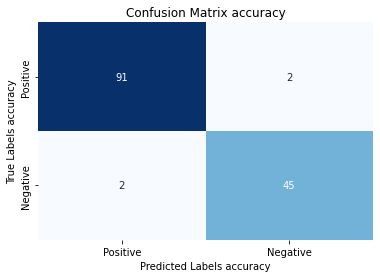

In [28]:
##evaluation confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_accuracysvm)
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Add labels, title and ticks to the plot
plt.title("Confusion Matrix accuracy")
plt.xlabel("Predicted Labels accuracy")
plt.ylabel("True Labels accuracy")
plt.xticks([0.5, 1.5], ["Positive","Negative"])
plt.yticks([0.5, 1.5], ["Positive","Negative"])

plt.show()



In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Create a Decision Tree classifier object
dtc = DecisionTreeClassifier()

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

# Perform grid search with cross-validation
grid_search_acc = GridSearchCV(dtc, param_grid=param_grid, scoring=scoring, refit='accuracy', cv=5)
grid_search_recall = GridSearchCV(dtc, param_grid=param_grid, scoring=scoring, refit='recall', cv=5)
grid_search_precision = GridSearchCV(dtc, param_grid=param_grid, scoring=scoring, refit='precision', cv=5)
grid_search_f1 = GridSearchCV(dtc, param_grid=param_grid, scoring=scoring, refit='f1', cv=5)

# Fit the grid search object to the data
grid_search_acc.fit(X_train, y_train)
grid_search_recall.fit(X_train, y_train)
grid_search_precision.fit(X_train, y_train)
grid_search_f1.fit(X_train, y_train)


# Predict on test set
y_pred_accuracydt = grid_search_acc.best_estimator_.predict(X_test)
y_pred_precisiondt = grid_search_precision.best_estimator_.predict(X_test)
y_pred_recalldt = grid_search_recall.best_estimator_.predict(X_test)
y_pred_f1dt = grid_search_f1.best_estimator_.predict(X_test)

# Print the best hyperparameters and metrics for each scoring metric
print("Best hyperparameters for accuracy: ", grid_search_acc.best_params_)
print("Best accuracy: ", classification_report(y_test, grid_search_acc.predict(X_test)))

print("Best hyperparameters for recall: ", grid_search_recall.best_params_)
print("Best recall: ", classification_report(y_test, grid_search_recall.predict(X_test)))

print("Best hyperparameters for precision: ", grid_search_precision.best_params_)
print("Best precision: ", classification_report(y_test, grid_search_precision.predict(X_test)))

print("Best hyperparameters for f1-score: ", grid_search_f1.best_params_)
print("Best f1-score: ", classification_report(y_test, grid_search_f1.predict(X_test)))


# Compute metrics
from sklearn import metrics
accuracy_score = metrics.accuracy_score(y_test, y_pred_accuracydt)
print("Accuracy Score:", accuracy_score)
Precision_score = metrics.precision_score(y_test, y_pred_precisiondt)
print("Precision Score:", Precision_score)
recall_score = metrics.recall_score(y_test, y_pred_recalldt)
print("recall Score:", recall_score)
f1_score = metrics.f1_score(y_test, y_pred_f1dt)
print("f1 Score:", f1_score)

Best hyperparameters for accuracy:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best accuracy:                precision    recall  f1-score   support

           0       0.92      0.96      0.94        93
           1       0.91      0.83      0.87        47

    accuracy                           0.91       140
   macro avg       0.91      0.89      0.90       140
weighted avg       0.91      0.91      0.91       140

Best hyperparameters for recall:  {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best recall:                precision    recall  f1-score   support

           0       0.92      0.96      0.94        93
           1       0.91      0.83      0.87        47

    accuracy                           0.91       140
   macro avg       0.91      0.89      0.90       140
weighted avg       0.91      0.91      0.91       140

Best hyperparameters for precision:  {'criterion': 'entropy', 'max_d

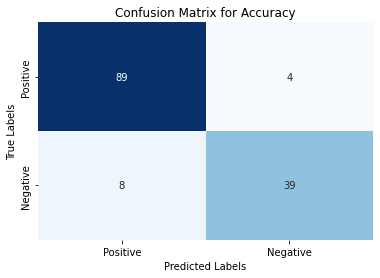

In [31]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix for accuracy
cm = confusion_matrix(y_test, y_pred_accuracydt)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Add labels, title and ticks to the plot
plt.title("Confusion Matrix for Accuracy")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks([0.5, 1.5], ["Positive","Negative"])
plt.yticks([0.5, 1.5], ["Positive","Negative"])

plt.show()

# # Calculate the confusion matrix for precision
# cm = confusion_matrix(y_test, y_pred_precisiondt)

# # Plot the confusion matrix as a heatmap
# sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# # Add labels, title and ticks to the plot
# plt.title("Confusion Matrix for Precision")
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.xticks([0.5, 1.5], ["Positive","Negative"])
# plt.yticks([0.5, 1.5], ["Positive","Negative"])

# plt.show()
